Ссылки на датасеты:
* https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
* https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [347]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import scipy.stats as sps
from statsmodels.stats.multitest import multipletests as mht
from tqdm.notebook import tqdm

In [348]:
data = pd.read_csv('creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [349]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Определим количество пустых ячеек

In [350]:
print('Обнаружено {} пустых ячеек.'.format(data.isnull().values.sum()))

Обнаружено 0 пустых ячеек.


Посмотрим, насколько несбалансирован датасет относительно целевой переменной

In [351]:
fraud = data['Class'][data['Class'] == 0].count() / data['Class'].size * 100
normal = data['Class'][data['Class'] == 1].count() / data['Class'].size * 100

print('Нормальные транзакции составляют {:.3f}% от всех операций.'.format(normal))
print('Опреции мошенников составляют {:.3f}%.'.format(fraud))

Нормальные транзакции составляют 0.173% от всех операций.
Опреции мошенников составляют 99.827%.


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [352]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, roc_auc_score, roc_curve

In [353]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

>### Логистическая регрессия

In [354]:
log_model = LogisticRegression(max_iter=10 ** 10)

In [355]:
a = log_model.fit(X_train, y_train)
y_pred = a.predict(X_test)
y_pred_proba = a.predict_proba(X_test)[: ,1]

In [356]:
log_reg_ac = accuracy_score(y_test, y_pred)
log_reg_rs = recall_score(y_test, y_pred)
log_reg_ps = precision_score(y_test, y_pred)
log_reg_f1 = f1_score(y_test, y_pred)
log_reg_rc = roc_curve(y_test, y_pred_proba)
log_reg_ra = roc_auc_score(y_test, y_pred_proba)

>### KNN

In [357]:
knn_model = KNeighborsClassifier(10)

In [358]:
a = knn_model.fit(X_train, y_train)
y_pred = a.predict(X_test)
y_pred_proba = a.predict_proba(X_test)[:, 1]

In [359]:
knn_ac = accuracy_score(y_test, y_pred)
knn_rs = recall_score(y_test, y_pred)
knn_ps = precision_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_rc = roc_curve(y_test, y_pred_proba)
knn_ra = roc_auc_score(y_test, y_pred_proba)

>### Константа

In [360]:
y_pred = np.zeros_like(y_test)

In [361]:
con_ac = accuracy_score(y_test, y_pred)
con_rs = recall_score(y_test, y_pred)
con_ps = precision_score(y_test, y_pred)
con_f1 = f1_score(y_test, y_pred)

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>### Метрики

In [362]:
pd.DataFrame({'accuracy': [log_reg_ac, knn_ac, con_ac],
              'recall': [log_reg_rs, knn_rs, con_rs],
              'precision': [log_reg_ps, knn_ps, con_ps],
              'f1 score': [log_reg_f1, knn_f1, con_f1],
              'roc auc score': [log_reg_ra, knn_ra, np.nan]},
              index=['log_reg', 'KNN', 'const'])

,accuracy,recall,precision,f1 score,roc auc score
log_reg,0.998619,0.588235,0.56338,0.575540,0.911206
KNN,0.998420,0.007353,1.00000,0.014599,0.647365
const,0.998408,0.000000,0.00000,0.000000,NaN


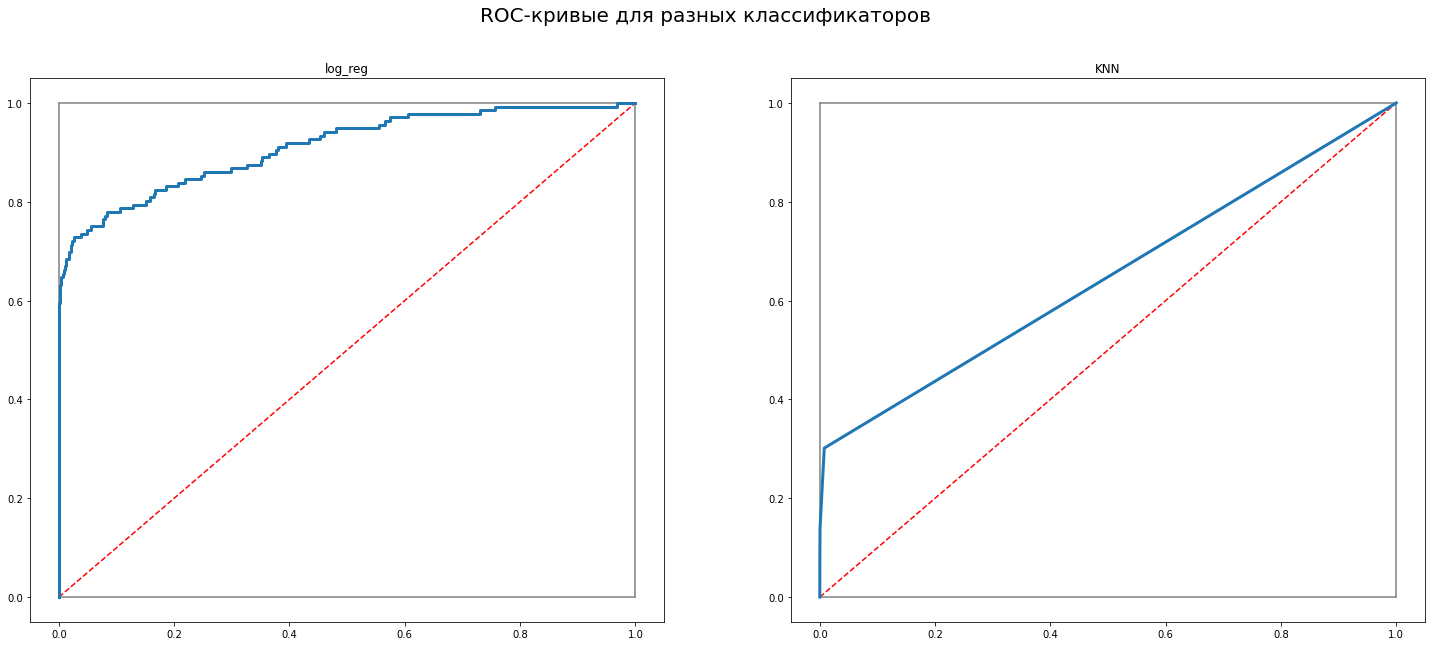

In [363]:
plt.figure(figsize=(25, 10))

plt.suptitle('ROC-кривые для разных классификаторов', size=20)

plt.subplot(1, 2, 1)
plt.title('log_reg')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.plot([0, 0], [0, 1], color='grey')
plt.plot([0, 1], [1, 1], color='grey')
plt.plot([1, 1], [1, 0], color='grey')
plt.plot([1, 0], [0, 0], color='grey')
plt.plot(log_reg_rc[0], log_reg_rc[1], lw=3)

plt.subplot(1, 2, 2)
plt.title('KNN')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.plot([0, 0], [0, 1], color='grey')
plt.plot([0, 1], [1, 1], color='grey')
plt.plot([1, 1], [1, 0], color='grey')
plt.plot([1, 0], [0, 0], color='grey')
plt.plot(knn_rc[0], knn_rc[1], lw=3)

plt.show()

>Как видно из полученных метрик лучше всего себя показывет логистическая регрессия. Ожидаемо метрика accuracy не отобразила какой-то реальной разности применяемых классификаторов в силу сильной несбалансированности датасета. KNN слишком плохо нашёл объекты нужного класса, судя по метрике recall, однако он не присвоил ни одной чистой транзакции статуса мошеннической. Логистическая регрессия ведёт себя примерно одинаково для метрик recall и precision. Судя по метрике f1 и по roc-auc логистическая регрессия справляется лучше всего.

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

>**Обоснование:** Сразу отпадает метрика accuracy, так как наш датасет сильно несбалансированный. Мы хотим как можно больше мошейников отловить, значит неплохо было бы использовать метрику precision. Однако при слишком большом количестве банов обычные пользователи могут начать жаловаться, поэтому надо как-то сбалансировать этот процесс в чём может помочь f1 метрика, поэтому остановимся на ней.

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

Переберём веса в логистической регрессии

In [364]:
from tqdm.notebook import tqdm
f1 = []
for i in tqdm(np.arange(0, 10.1, 0.1)):
    model = LogisticRegression(class_weight={1: i, 0: 10 - i}, max_iter=10 ** 10)
    model.fit(X_train, y_train)
    f1.append(f1_score(y_test, model.predict(X_test)))

  0%|          | 0/101 [00:00<?, ?it/s]

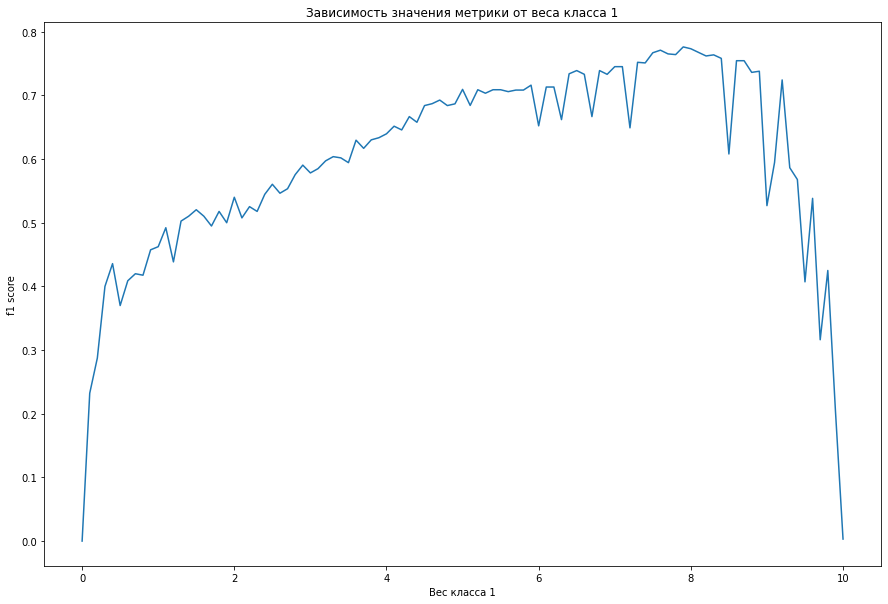

In [365]:
plt.figure(figsize=(15, 10))

plt.title('Зависимость значения метрики от веса класса 1')

plt.plot(np.arange(0, 10.1, 0.1), f1)

plt.xlabel('Вес класса 1')
plt.ylabel('f1 score')

plt.show()

In [366]:
max_w = np.arange(0, 10.1, 0.1)[np.array(f1).argmax()]

In [367]:
print('Вес класса 1 и для максимизации f1 метрики равен {}'.format((max_w)))

Вес класса 1 и для максимизации f1 метрики равен 7.9


>Удалось поднять значение метрики на 20% в сравнении с изначальным результатом.

Переберём рандомом признаки.

In [377]:
f1 = []
state = []
for i in tqdm(range(500)):
    model = LogisticRegression(class_weight={1: max_w, 0: 10 - max_w}, max_iter=10 ** 10)
    a = list(set(np.random.randint(0, 30, size=30)))
    model.fit(X_train[X_train.columns[a]], y_train)
    f1.append(f1_score(y_test, model.predict(X_test[X_test.columns[a]])))
    state.append(a)

  0%|          | 0/500 [00:00<?, ?it/s]

In [378]:
f1 = np.array(f1)
max_state = X_train.columns.values[state[f1.argmax()]]
print('Наибольщее значение метрики равно {:.4f} при признаках {}'.format(f1.max(), max_state))

Наибольщее значение метрики равно 0.8244 при признаках ['Time' 'V1' 'V2' 'V7' 'V8' 'V10' 'V12' 'V14' 'V16' 'V18' 'V19' 'V20'
 'V21' 'V22' 'V24' 'V25' 'V27' 'V28' 'Amount']


>Попробуем улучшить результаты для KNN.

Посмотрим как зависит метрика f1 от количества соседей в KNN

In [379]:
f1 = []
for i in tqdm(range(5, 26)):
    model = KNeighborsClassifier(i)
    model.fit(X_train, y_train)
    f1.append(f1_score(y_test, model.predict(X_test)))

  0%|          | 0/21 [00:00<?, ?it/s]

In [380]:
print('Максимальное значение метрики равное {:.4f} достигается при {} соседях.'.format(max(f1), np.array(f1).argmax() + 5))

Максимальное значение метрики равное 0.0845 достигается при 5 соседях.


>Значение метрики для KNN мало, а исследование занимает слишком много времени, так как модель долго работает. Поэтому сосредоточимся на исследовании логистической регрессии.

Попробуем посмотреть на зависимость целевой переменной от признаков при помощи коэффициента Спирмена, а затем применим МПГ, ограничив FDR для отбора интересных признаков.

In [381]:
main_atr = X_test.columns[mht(np.array([sps.spearmanr(X_train[i], y_train)[1] for i in X_test.columns]), method='fdr_by')[0]]

In [382]:
model = LogisticRegression(class_weight={1: max_w, 0: 10 - max_w}, max_iter=10 ** 10)
model.fit(X_train[main_atr], y_train)
print('Значение метрики после отбора признаков равно {}'.format(f1_score(y_test, model.predict(X_test[main_atr]))))

Значение метрики после отбора признаков равно 0.7575757575757576


>Результат отсутствует.

Посмотрим, как влияет на значение метрики регурялизация.

In [383]:
f1 = []

C = np.arange(0.1, 10.1, 0.1)

for i in tqdm(C):
    model = LogisticRegression(max_iter=10 ** 10, penalty='l2', C=i, class_weight={1: max_w, 0: 10 - max_w})
    model.fit(X_train[max_state], y_train)
    f1.append(f1_score(y_test, model.predict(X_test[max_state])))

  0%|          | 0/100 [00:00<?, ?it/s]

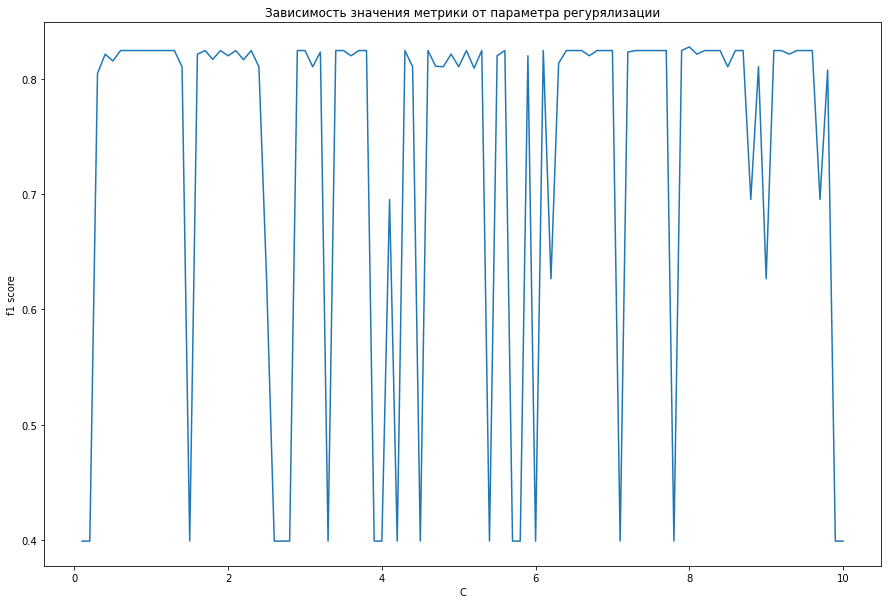

In [384]:
plt.figure(figsize=(15, 10))

plt.title('Зависимость значения метрики от параметра регурялизации')

plt.plot(C, f1)

plt.xlabel('C')
plt.ylabel('f1 score')

plt.show()

>Особых улучшений не неаблюдается.

>**Вывод:** Удалось повысить значение метрики с 0.58 до 0.83 путём подбора весов и подбора параметров (возможно, последене &mdash; это не самое лучшее решение, и повышение значения метрики связанно с переобучением).

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [385]:
data = pd.read_csv('star_classification.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Описание признаков:

* obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

* alpha = Right Ascension angle (at J2000 epoch)
* delta = Declination angle (at J2000 epoch)
* u = Ultraviolet filter in the photometric system
* g = Green filter in the photometric system
* r = Red filter in the photometric system
* i = Near Infrared filter in the photometric system
* z = Infrared filter in the photometric system
* run_ID = Run Number used to identify the specific scan
* rereun_ID = Rerun Number to specify how the image was processed
* cam_col = Camera column to identify the scanline within the run
* field_ID = Field number to identify each field
* spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
* class = object class (galaxy, star or quasar object)
* redshift = redshift value based on the increase in wavelength
* plate = plate ID, identifies each plate in SDSS
* MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

Таргетом сделаем признак `class`. Для обучения модели выберем признаки `alpha`, `delta`, `u`, `g`, `r`, `i`, `z` и `redshift`, остальные признаки не дают важной информации, а используются для документации измемрений.

In [386]:
data['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

>Классы несбалансированны, но всё гораздо лучше, чем в предыдущем датасете.

In [387]:
X = data.drop(['class', 'obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

>### Логистическая регрессия

In [388]:
log_model = LogisticRegression(max_iter=10 ** 10)

In [389]:
a = log_model.fit(X_train, y_train)
y_pred = a.predict(X_test)

In [390]:
log_reg_ac = accuracy_score(y_test, y_pred)
log_reg_rs = recall_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='weighted')
log_reg_ps = precision_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='macro'), precision_score(y_test, y_pred, average='weighted')
log_reg_f1 = f1_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='weighted')

>### KNN

In [391]:
knn_model = KNeighborsClassifier(5)

In [392]:
a = knn_model.fit(X_train, y_train)
y_pred = a.predict(X_test)

In [393]:
knn_ac = accuracy_score(y_test, y_pred)
knn_rs = recall_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='weighted')
knn_ps = precision_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='macro'), precision_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='weighted')

>### Константа

In [394]:
y_pred = np.full_like(y_test, 'GALAXY')

In [395]:
con_ac = accuracy_score(y_test, y_pred)
con_rs = recall_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='weighted')
con_ps = precision_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='macro'), precision_score(y_test, y_pred, average='weighted')
con_f1 = f1_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='weighted')

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>### Метрики

In [396]:
pd.DataFrame({'accuracy': [log_reg_ac, knn_ac, con_ac],
              'recall micro': [log_reg_rs[0], knn_rs[0], con_rs[0]],
              'recall macro': [log_reg_rs[1], knn_rs[1], con_rs[1]],
              'recall weighted': [log_reg_rs[2], knn_rs[2], con_rs[2]],
              'precision micro': [log_reg_ps[0], knn_ps[0], con_ps[0]],
              'precision macro': [log_reg_ps[1], knn_ps[1], con_ps[1]],
              'precision weighted': [log_reg_ps[2], knn_ps[2], con_ps[2]],
              'f1 score micro': [log_reg_f1[0], knn_f1[0], con_f1[0]],
              'f1 score macro': [log_reg_f1[1], knn_f1[1], con_f1[1]],
              'f1 score weighted': [log_reg_f1[2], knn_f1[2], con_f1[2]]},
              index=['log_reg', 'KNN', 'const'])

,accuracy,recall micro,recall macro,recall weighted,precision micro,precision macro,precision weighted,f1 score micro,f1 score macro,f1 score weighted
log_reg,0.954667,0.954667,0.947520,0.954667,0.954667,0.950112,0.954768,0.954667,0.948113,0.954295
KNN,0.826533,0.826533,0.757931,0.826533,0.826533,0.817822,0.822766,0.826533,0.779588,0.818072
const,0.594833,0.594833,0.333333,0.594833,0.594833,0.198278,0.353827,0.594833,0.248650,0.443716


>В этот раз логистическая регрессия снова выдала лучшие значения метрик, однако уступила по времени работы методу KNN.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

>**Обоснование:** в качестве метрики выберим precission, так как исследовательские программы обычно планируются на долгое время вперёд и не хочется впустую потратить выделенное время.

Посмотрим какие признаки коррелируют c целевой переменной.

In [397]:
main_atr = X_train.columns[mht(np.array([sps.spearmanr(X_train[i], y_train)[1] for i in X_train.columns]), method='fdr_by')[0]]

In [398]:
main_atr

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')

>Как видим, все признаки влияют на целевую переменную, поэтому нет смысла выкидывать какие-нибудь из них.

Исследуем метод KNN. Сначала посмотрим влияние параметра `weights`.

In [399]:
knn_model = KNeighborsClassifier(weights='distance')
a = knn_model.fit(X_train, y_train)
y_pred = a.predict(X_test)
print('Значение метрики равно {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))

Значение метрики равно 0.8358


>Лучше использовать такое значение параметра, что логично, ведь тогда дальние объекты слабее учитываются.

Попробуем скомбинировать признаки световых фильров и красного смещения (наверно, они должны быть связаны).

In [400]:
data['xxx'] = data['r'] * data['redshift'] * data['u'] * data['g'] * data['i'] * data['z']

In [401]:
X = data.drop(['class', 'obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [402]:
knn_model = KNeighborsClassifier(weights='distance')
a = knn_model.fit(X_train, y_train)
y_pred = a.predict(X_test)
print('Значение метрики равно {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))

Значение метрики равно 0.8893


>Значимое улучшение.

Подберём оптимальное количество соседей

In [403]:
score = []
for i in range(1, 101):
    knn_model = KNeighborsClassifier(i, weights='distance')
    a = knn_model.fit(X_train, y_train)
    y_pred = a.predict(X_test)
    score.append(precision_score(y_test, y_pred, average='micro'))

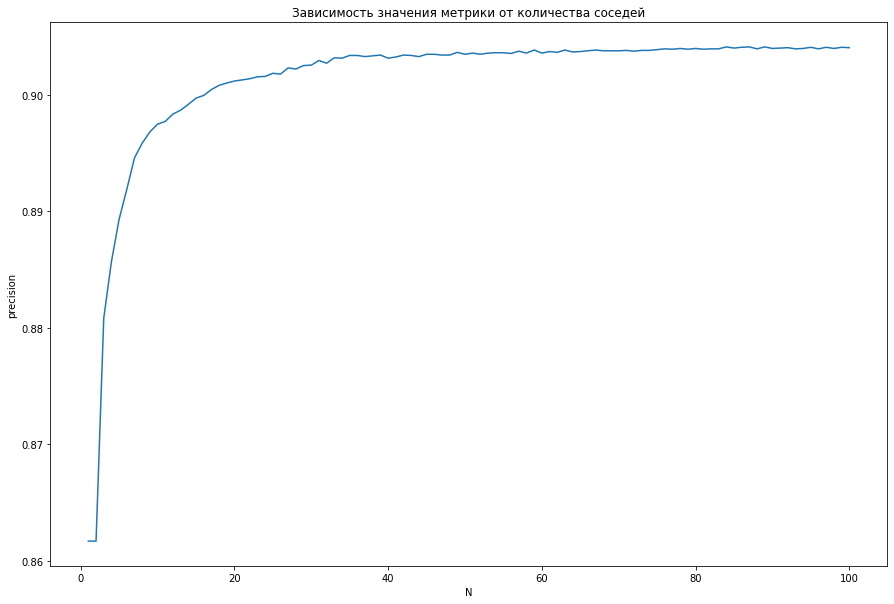

In [404]:
plt.figure(figsize=(15, 10))

plt.title('Зависимость значения метрики от количества соседей')

plt.plot(np.arange(1, 101), score)

plt.xlabel('N')
plt.ylabel('precision')

plt.show()

In [405]:
score = np.array(score)
print('Наибольшее значение метрики равное {:.4f} достигается при {} соедях'.format(score.max(), score.argmax() + 1))

Наибольшее значение метрики равное 0.9041 достигается при 84 соедях


>Небольшое улучшение.

Посмотрим, как влияет метод подсчёта расстояния между объектами на значение метрики.

In [406]:
score = []
for i in range(1, 10):
    knn_model = KNeighborsClassifier(84, p=i, weights='distance')
    a = knn_model.fit(X_train, y_train)
    y_pred = a.predict(X_test)
    score.append(precision_score(y_test, y_pred, average='micro'))

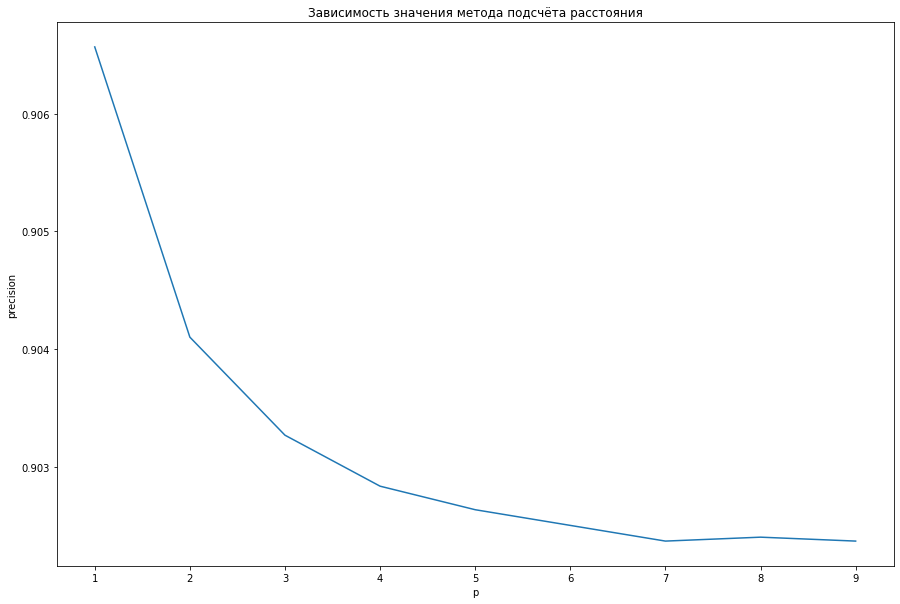

In [407]:
plt.figure(figsize=(15, 10))

plt.title('Зависимость значения метода подсчёта расстояния')

plt.plot(np.arange(1, 10), score)

plt.xlabel('p')
plt.ylabel('precision')

plt.show()

In [408]:
score = np.array(score)
print('Наибольшее значение метрики равное {:.4f} достигается при p = {}'.format(score.max(), score.argmax() + 1))

Наибольшее значение метрики равное 0.9066 достигается при p = 1


>Небольшое улучшение.

Посмотрим как влияет параметр  `leaf_size` на значение метрики

In [409]:
score = []
for i in range(1, 101):
    knn_model = KNeighborsClassifier(84, p=1, leaf_size=i)
    a = knn_model.fit(X_train, y_train)
    y_pred = a.predict(X_test)
    score.append(precision_score(y_test, y_pred, average='micro'))

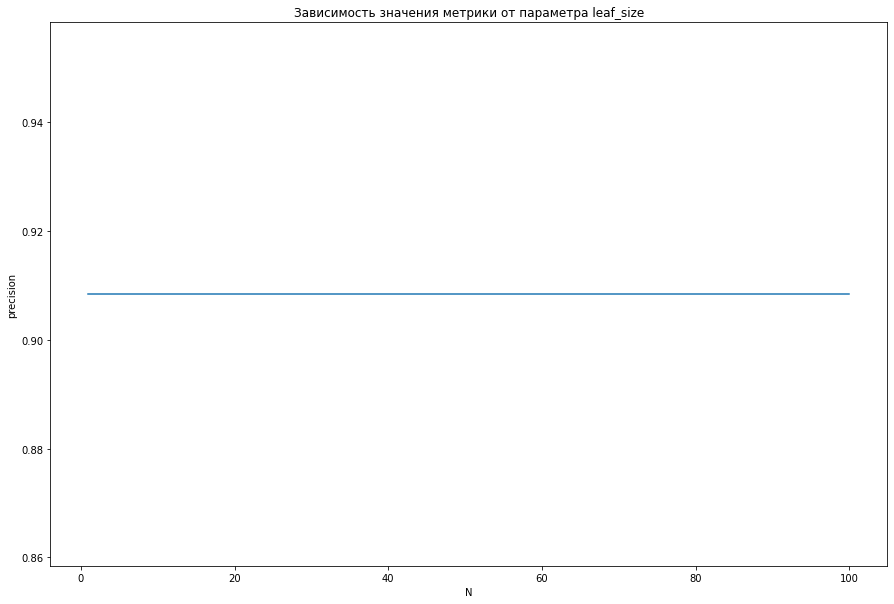

In [410]:
plt.figure(figsize=(15, 10))

plt.title('Зависимость значения метрики от параметра leaf_size')

plt.plot(np.arange(1, 101), score)

plt.xlabel('N')
plt.ylabel('precision')

plt.show()

>Никак.

>**Вывод:** Для метода KNN удалось увеличить метрику на 10%.

Исследуем логистическую регрессию. Сначала попробуем подобрать весы для классов.

In [411]:
data = pd.read_csv('star_classification.csv')
X = data.drop(['class', 'obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [412]:
score = []
for i in range(1, 4):
    for j in range(1, 4):
        for k in range(1, 4):
            log_model = LogisticRegression(max_iter=10 ** 10, class_weight={'GALAXY': i, 'STAR': j, 'QSO': k})
            a = log_model.fit(X_train, y_train)
            y_pred = a.predict(X_test)
            score.append(precision_score(y_test, y_pred, average='micro'))

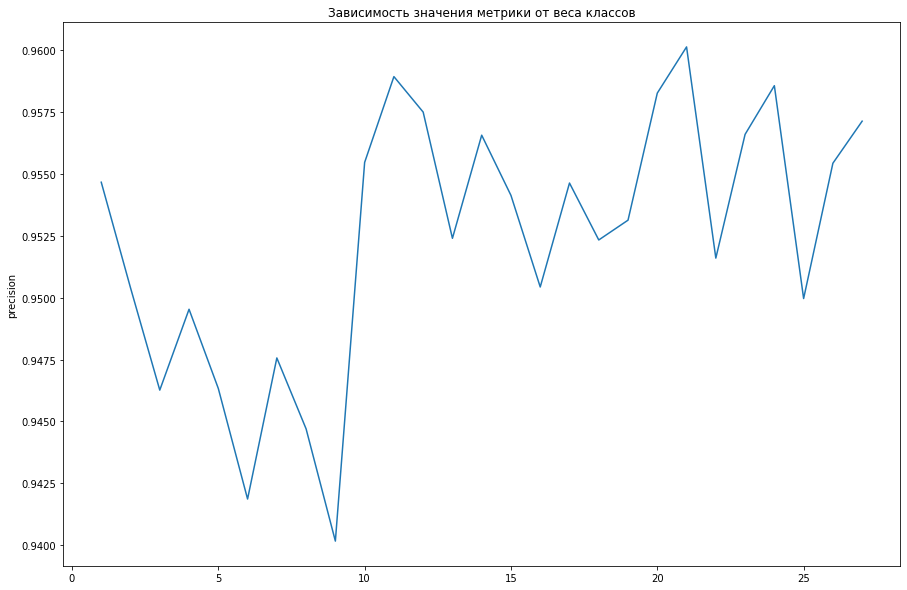

In [413]:
plt.figure(figsize=(15, 10))

plt.title('Зависимость значения метрики от веса классов')

plt.plot(np.arange(1, 28), score)

plt.ylabel('precision')

plt.show()

In [414]:
score = np.array(score)
print('Наибольшее значение метрики равное {:.4f} достигается при i = {}, j = {}, k = {}'.format(score.max(), score.argmax() // 9 + 1, (score.argmax() % 9 + 1) // 3, (score.argmax() % 9) % 3 + 1))

Наибольшее значение метрики равное 0.9601 достигается при i = 3, j = 1, k = 3


>Результат слегка улучишлся.

Посмотрим, как изменится значение метрики, если использовать комбинацию признаков из предыдущего пункта.

In [415]:
data['xxx'] = data['r'] * data['redshift'] * data['u'] * data['g'] * data['i'] * data['z']

In [416]:
X = data.drop(['class', 'obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [417]:
log_model = LogisticRegression(max_iter=10 ** 10, class_weight={'GALAXY': 3, 'STAR': 1, 'QSO': 3})
a = log_model.fit(X_train, y_train)
y_pred = a.predict(X_test)
print('Значение метрики равно {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))

Значение метрики равно 0.8869


>Результат значительно ухудшился.

Применим регурялизацию.

In [418]:
data = pd.read_csv('star_classification.csv')
X = data.drop(['class', 'obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [419]:
score = []

C = np.arange(0.5, 10.5, 0.5)

for i in tqdm(C):
    model = LogisticRegression(max_iter=10 ** 10, penalty='l2', C=i, class_weight={'GALAXY': 3, 'STAR': 1, 'QSO': 3})
    model.fit(X_train, y_train)
    score.append(precision_score(y_test, y_pred, average='micro'))

  0%|          | 0/20 [00:00<?, ?it/s]

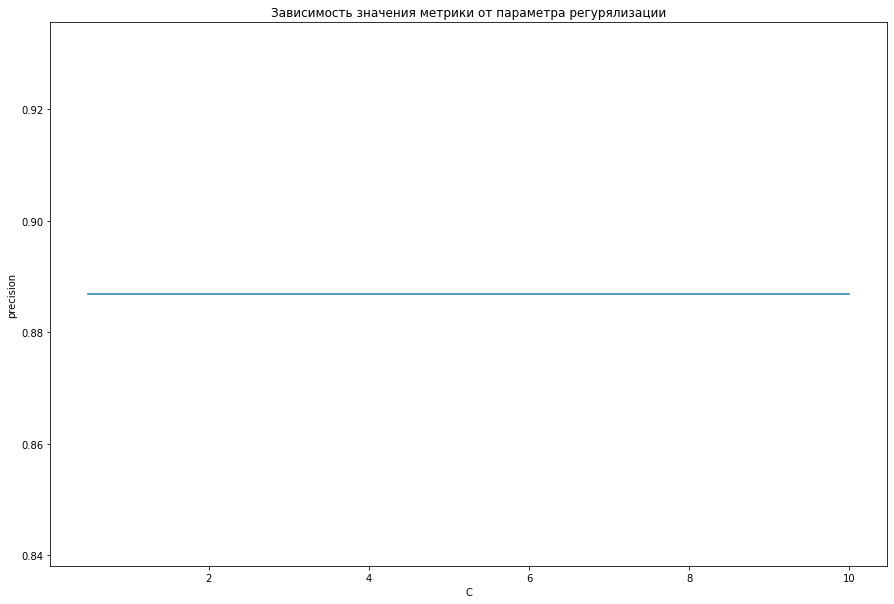

In [420]:
plt.figure(figsize=(15, 10))

plt.title('Зависимость значения метрики от параметра регурялизации')

plt.plot(C, score)

plt.xlabel('C')
plt.ylabel('precision')

plt.show()

>Значение метрики упало.

>**Вывод:** Для логистической регресси не получилось существенно увеличить значение метрики.